<a href="https://colab.research.google.com/github/marcus-tam/ws_selenium_trader/blob/main/sma_trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pip install required packages and import

In [4]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 4.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=4f027b3900b3876870d95510f7ebef4541368b20db3e807fa1b9f63a1e36b71f
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [80]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
from pprint import PrettyPrinter
import yfinance as yf
import pandas as pd
import math
import numpy as np
import io

Set plot style to dark background (gamer time)

PP is used for printing with natural indents (used in .py version but not necessary for .ipynp)

set up SMA 30 and SMA 100

set up start and end times.


In [106]:
plt.style.use("dark_background")
pp = PrettyPrinter(indent=4)

ma_1 = 30
ma_2 = 100

start = dt.datetime.now() - dt.timedelta(days=365*6)
end = dt.datetime.now()

Download ticker data

In [118]:
data = yf.download('NIO', start=start, end = end)
pp.pprint(data)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-09-12   6.000000   6.930000   5.350000   6.600000   6.600000   66849000
2018-09-13   6.620000  12.690000   6.520000  11.600000  11.600000  158346500
2018-09-14  12.660000  13.800000   9.220000   9.900000   9.900000  172473600
2018-09-17   9.610000   9.750000   8.500000   8.500000   8.500000   56323900
2018-09-18   8.730000   9.100000   7.670000   7.680000   7.680000   41827600
...               ...        ...        ...        ...        ...        ...
2021-07-08  43.860001  46.259998  42.730000  45.599998  45.599998   93774800
2021-07-09  46.709999  47.009998  44.580002  45.529999  45.529999   64517900
2021-07-12  45.970001  46.820000  44.599998  46.340000  46.340000   54668300
2021-07-13  46.200001  46.910000  44.930000  44.959999  44.959999   44509600
2021-07

Add new fields in dataframe. SMA_30 and SMA_100

In [119]:
data[f'SMA_{ma_1}'] = data['Close'].rolling(window=ma_1).mean()
data[f'SMA_{ma_2}'] = data['Close'].rolling(window=ma_2).mean()

data = data.iloc[ma_2:]

Create variables to store when to buy and sell.

Trigger is used as a lock mechanism so we don't have multiple buy and sell orders when SMA's cross for extended periods of time.

In [120]:
buy_signals = []
sell_signals = []
trigger = 0

Loop through data dataframe. 

If SMA30 is greater than SMA100 (and trigger lock mechanism is satisfied): append new buy point.

Else if SMA30 is less than SMA100 (and trigger lock mechanism is satisfied);
append new sell point.

else: append 'NAN' values. 

In [121]:
for x in range(len(data)):
    if data[f"SMA_{ma_1}"].iloc[x] > data[f'SMA_{ma_2}'].iloc[x] and trigger != 1:
        buy_signals.append(data['Close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger = 1
    elif data[f"SMA_{ma_1}"].iloc[x] < data[f'SMA_{ma_2}'].iloc[x] and trigger != -1:
        buy_signals.append(float('nan'))
        sell_signals.append(data['Close'].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))

Add new buy and sells to data dataframe

In [122]:
data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

print(data)

                 Open       High        Low  ...  SMA_100  Buy Signals  Sell Signals
Date                                         ...                                    
2019-02-06   7.950000   8.590000   7.830000  ...   7.1131          NaN           8.4
2019-02-07   8.280000   8.370000   7.800000  ...   7.0775          NaN           NaN
2019-02-08   8.000000   8.000000   7.280000  ...   7.0552          NaN           NaN
2019-02-11   7.670000   7.770000   7.380000  ...   7.0448          NaN           NaN
2019-02-12   7.350000   7.570000   7.140000  ...   7.0424          NaN           NaN
...               ...        ...        ...  ...      ...          ...           ...
2021-07-08  43.860001  46.259998  42.730000  ...  41.8363          NaN           NaN
2021-07-09  46.709999  47.009998  44.580002  ...  41.6993          NaN           NaN
2021-07-12  45.970001  46.820000  44.599998  ...  41.5895          NaN           NaN
2021-07-13  46.200001  46.910000  44.930000  ...  41.4948        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Create new plot 

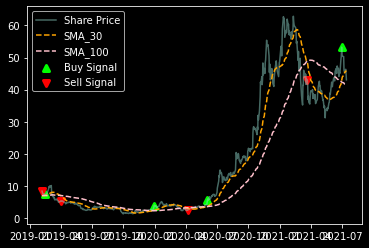

In [123]:
plt.plot(data['Close'], label = "Share Price", alpha=0.5)
plt.plot(data[f"SMA_{ma_1}"], label = f"SMA_{ma_1}", color="orange", linestyle="--")
plt.plot(data[f"SMA_{ma_2}"], label = f"SMA_{ma_2}", color="pink", linestyle="--")
plt.scatter(data.index, data['Buy Signals'], label="Buy Signal", marker="^", color="#00ff00", lw = 3)
plt.scatter(data.index, data['Sell Signals'], label="Sell Signal", marker="v", color="#ff0000", lw = 3)
plt.legend(loc="upper left")
plt.show()

Backtesting

In [124]:
"""
Create empty lists and prepare to append buy and sell signals where at least 1 value exists.
There must be an easier way to vectorize and streamline this process but it do be like this.
"""
merged = list()
date_list = list()

temp = data[['Buy Signals', 'Sell Signals']]
for index, row in temp.iterrows():
  if not math.isnan(row["Buy Signals"]) or not math.isnan(row["Sell Signals"]):
    np_array = np.array([row["Buy Signals"], row["Sell Signals"]])
    merged.append(np_array)
    date_list.append(index)
merged = pd.DataFrame(merged, columns=['Buys', 'Sells'])
merged.index = pd.to_datetime(date_list)

In [125]:
total_profit = merged.shift(-1).Sells-merged.Buys

In [126]:
relprofits = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [127]:
relprofits.mean()

2.0174745803415166